# Импорт необходимых библиотек

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline

# Чтение файла с признаками

In [2]:
pandas.set_option('display.max_columns', None)

df = pandas.read_csv('./features.csv', index_col='match_id')

# Предварительный анализ признаков

In [3]:
description = df.describe()
description

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_hero,r2_level,r2_xp,r2_gold,r2_lh,r2_kills,r2_deaths,r2_items,r3_hero,r3_level,r3_xp,r3_gold,r3_lh,r3_kills,r3_deaths,r3_items,r4_hero,r4_level,r4_xp,r4_gold,r4_lh,r4_kills,r4_deaths,r4_items,r5_hero,r5_level,r5_xp,r5_gold,r5_lh,r5_kills,r5_deaths,r5_items,d1_hero,d1_level,d1_xp,d1_gold,d1_lh,d1_kills,d1_deaths,d1_items,d2_hero,d2_level,d2_xp,d2_gold,d2_lh,d2_kills,d2_deaths,d2_items,d3_hero,d3_level,d3_xp,d3_gold,d3_lh,d3_kills,d3_deaths,d3_items,d4_hero,d4_level,d4_xp,d4_gold,d4_lh,d4_kills,d4_deaths,d4_items,d5_hero,d5_level,d5_xp,d5_gold,d5_lh,d5_kills,d5_deaths,d5_items,first_blood_time,first_blood_team,first_blood_player1,first_blood_player2,radiant_bottle_time,radiant_courier_time,radiant_flying_courier_time,radiant_tpscroll_count,radiant_boots_count,radiant_ward_observer_count,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
count,9.723000e+04,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,77677.000000,77677.000000,77677.000000,53243.000000,81539.000000,96538.000000,69751.000000,97230.000000,97230.000000,97230.000000,97230.000000,95394.000000,81087.000000,96554.000000,71132.000000,97230.000000,97230.000000,97230.000000,97230.000000,95404.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000
mean,1.444232e+09,2.630999,51.517104,3.442672,1233.405801,1147.899702,11.231996,0.357009,0.362285,8.271315,52.183452,3.364661,1189.223676,1107.863993,10.471747,0.348709,0.363550,8.275584,52.710491,3.353924,1182.879965,1099.643742,10.333004,0.342723,0.357338,8.273527,52.648092,3.308896,1159.088481,1082.090240,9.981909,0.337746,0.357307,8.275049,52.625630,3.304237,1158.586167,1082.057061,9.995351,0.337262,0.352782,8.288491,51.990106,3.461123,1238.855765,1151.018184,11.253841,0.372262,0.344091,8.296380,52.708547,3.388933,1199.858809,1108.633436,10.460424,0.356238,0.347012,8.310419,52.755137,3.378638,1193.554438,1103.273702,10.386918,0.353533,0.347732,8.305420,52.922421,3.337725,1171.952155,1088.711653,10.035349,0.354952,0.341860,8.319665,53.059694,3.345274,1177.395351,1089.558850,10.053739,0.356063,0.342538,8.323048,97.688029,0.521815,4.593483,4.383224,126.800255,-80.059510,215.987126,2.994775,3.312527,2.431719,0.716250,-6.875747,127.215028,-80.191893,214.870536,2.965566,3.349553,2.448339,0.689119,-6.901922,2332.247886,0.518503,1309.227790,1286.310820,40.599095,41.337036
std,5.515393e+06,2.835761,32.564211,1.111741,566.588895,464.111662,9.041620,0.663889,0.626704,2.497575,32.674077,1.097536,555.363510,458.001007,8.972073,0.654060,0.624236,2.433864,32.560923,1.092126,554.899600,454.727127,8.950871,0.647774,0.618071,2.440139,32.670519,1.092502,550.937530,450.353291

In [4]:
df.head(10)

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_hero,r2_level,r2_xp,r2_gold,r2_lh,r2_kills,r2_deaths,r2_items,r3_hero,r3_level,r3_xp,r3_gold,r3_lh,r3_kills,r3_deaths,r3_items,r4_hero,r4_level,r4_xp,r4_gold,r4_lh,r4_kills,r4_deaths,r4_items,r5_hero,r5_level,r5_xp,r5_gold,r5_lh,r5_kills,r5_deaths,r5_items,d1_hero,d1_level,d1_xp,d1_gold,d1_lh,d1_kills,d1_deaths,d1_items,d2_hero,d2_level,d2_xp,d2_gold,d2_lh,d2_kills,d2_deaths,d2_items,d3_hero,d3_level,d3_xp,d3_gold,d3_lh,d3_kills,d3_deaths,d3_items,d4_hero,d4_level,d4_xp,d4_gold,d4_lh,d4_kills,d4_deaths,d4_items,d5_hero,d5_level,d5_xp,d5_gold,d5_lh,d5_kills,d5_deaths,d5_items,first_blood_time,first_blood_team,first_blood_player1,first_blood_player2,radiant_bottle_time,radiant_courier_time,radiant_flying_courier_time,radiant_tpscroll_count,radiant_boots_count,radiant_ward_observer_count,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
match_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,67,3,842,991,10,0,0,4,29,5,1909,1143,10,0,0,8,20,3,757,741,6,0,0,7,105,3,732,658,4,0,1,11,4,3,1058,996,12,0,0,6,42,4,1085,986,12,0,0,4,21,5,2052,1536,23,0,0,6,37,3,742,500,2,0,0,8,84,3,958,1003,3,1,0,9,7.0,1.0,9.0,NaN,134.0,-80.0,244.0,2,2,2,0,35.0,103.0,-84.0,221.0,3,4,2,2,-52.0,2874,1,1796,0,51,0
1,1430220345,0,42,4,1188,1033,9,0,1,12,49,4,1596,993,10,0,1,7,67,4,1506,1502,18,1,0,7,37,3,669,631,7,0,0,7,26,2,415,539,1,0,0,5,39,5,1960,1384,16,0,0,8,88,3,640,566,1,0,1,5,79,3,720,1350,2,2,0,12,7,2,440,583,0,0,0,7,12,4,1470,1622,24,0,0,9,54.0,1.0,7.0,NaN,173.0,-80.0,NaN,2,0,2,0,-20.0,149.0,-84.0,195.0,5,4,3,1,-5.0,2463,1,1974,0,63,1
2,1430227081,7,33,4,1319,1270,22,0,0,12,98,3,1314,775,6,0,0,6,20,3,1297,909,0,1,0,6,27,5,2360,2096,26,1,1,6,4,3,1395,1627,27,0,0,9,22,5,2305,2028,19,1,1,10,66,3,1024,959,19,0,1,10,86,3,755,620,3,0,0,8,29,4,1319,667,4,0,0,7,80,3,1350,1512,25,0,0,7,224.0,0.0,3.0,NaN,63.0,-82.0,NaN,2,5,2,1,-39.0,45.0,-77.0,221.0,3,4,3,1,13.0,2130,0,0,1830,0,63
3,1430263531,1,29,4,1779,1056,14,0,0,5,30,2,539,539,1,0,0,6,75,5,2037,1139,15,0,0,6,37,2,591,499,0,0,0,6,41,3,712,1075,12,0,0,6,96,5,1878,1174,17,0,0,6,48,3,732,1468,22,0,0,10,15,4,1681,1051,11,0,0,7,102,2,674,537,1,0,0,7,20,2,510,499,0,0,0,7,NaN,NaN,NaN,NaN,208.0,-75.0,NaN,0,3,2,0,-30.0,124.0,-80.0,184.0,0,4,2,0,27.0,1459,0,1920,2047,50,63
4,1430282290,7,13,4,1431,1090,8,1,0,8,27,2,629,552,0,0,1,7,30,3,884,927,0,1,0,8,72,3,925,1439,16,1,0,11,93,4,1482,880,7,0,0,8,26,3,704,586,1,0,2,9,69,3,1169,1665,20,1,0,7,22,3,1055,638,1,0,0,9,25,5,1815,1275,18,0,0,8,8,4,1119,904,6,0,1,7,-21.0,1.0,6.0,NaN,166.0,-81.0,181.0,1,4,2,0,46.0,182.0,-80.0,225.0,6,3,3,0,-16.0,2449,0,4,1974,3,63
5,1430284186,1,11,5,1961,1461,19,0,1,6,20,2,441,686,4,0,0,5,28,4,1874,1438,22,0,0,4,25,2,528,800,1,1,0,9,65,3,799,785,6,0,1,6,55,3,847,785,7,0,1,7,52,2,455,967,2,1,0,11,3,2,279,916,0,1,0,10,73,5,2065,2565,26,0,0,13,48,5,2029,1781,29,0,0,8,78.0,1.0,7.0,NaN,35.0,-85.0,182.0,5,4,2,1,-27.0,2.0,-86.0,212.0,4,4,4,0,-43.0,1453,0,512,2038,0,63
8,1430293701,1,8,3,967,1136,7,1,0,8,57,4,1774,1592,19,1,0,8,7,3,904,1119,7,0,1,12,21,4,1523,1061,5,1,1,8,36,2,553,657,1,0,2,10,22,4,1958,1680,19,1,1,9,30,3,1026,704,0,0,1,8,72,3,1161,1668,19,1,0,9,101,3,681,931,6,1,1,13,47,5,2282,1998,30,1,0,16,-34.0,1.0,7.0,NaN,229.0,-77.0,299.0,11,3,3,2,-35.0,6.0,-86.0,182.0,3,6,3,0,10.0,1968,0,1536,1983,12,63
9,1430299335,7,35,5,2117,1252,16,0,0,6,15,3,1378,1430,23,0,0,4,83,2,259,500,0,0,0,6,29,3,825,818,8,0,0,8,101,2,357,500,0,0,0,7,100,2,350,523,0,0,0,9,25,5,2323,1890,25,0,0,7,26,2,310,523,0,0,0,7,44,4,1387,1275,19,0,0,7,96,4,1408,883,8,0,0,7,NaN,NaN,NaN,NaN,NaN,-85.0,NaN,1,2,2,1,26.0,119.0,

#### Описание признаков в таблице

- `match_id`: идентификатор матча в наборе данных
- `start_time`: время начала матча (unixtime)
- `lobby_type`: тип комнаты, в которой собираются игроки (расшифровка в `dictionaries/lobbies.csv`)
- Наборы признаков для каждого игрока (игроки команды Radiant — префикс `rN`, Dire — `dN`):
    - `r1_hero`: герой игрока (расшифровка в dictionaries/heroes.csv)
    - `r1_level`: максимальный достигнутый уровень героя (за первые 5 игровых минут)
    - `r1_xp`: максимальный полученный опыт
    - `r1_gold`: достигнутая ценность героя
    - `r1_lh`: число убитых юнитов
    - `r1_kills`: число убитых игроков
    - `r1_deaths`: число смертей героя
    - `r1_items`: число купленных предметов
- Признаки события "первая кровь" (first blood). Если событие "первая кровь" не успело произойти за первые 5 минут, то признаки принимают пропущенное значение
    - `first_blood_time`: игровое время первой крови
    - `first_blood_team`: команда, совершившая первую кровь (0 — Radiant, 1 — Dire)
    - `first_blood_player1`: игрок, причастный к событию
    - `first_blood_player2`: второй игрок, причастный к событию
- Признаки для каждой команды (префиксы `radiant_` и `dire_`)
    - `radiant_bottle_time`: время первого приобретения командой предмета "bottle"
    - `radiant_courier_time`: время приобретения предмета "courier" 
    - `radiant_flying_courier_time`: время приобретения предмета "flying_courier" 
    - `radiant_tpscroll_count`: число предметов "tpscroll" за первые 5 минут
    - `radiant_boots_count`: число предметов "boots"
    - `radiant_ward_observer_count`: число предметов "ward_observer"
    - `radiant_ward_sentry_count`: число предметов "ward_sentry"
    - `radiant_first_ward_time`: время установки командой первого "наблюдателя", т.е. предмета, который позволяет видеть часть игрового поля
- Итог матча (данные поля отсутствуют в тестовой выборке, поскольку содержат информацию, выходящую за пределы первых 5 минут матча)
    - `duration`: длительность
    - `radiant_win`: 1, если победила команда Radiant, 0 — иначе
    - Состояние башен и барраков к концу матча (см. описание полей набора данных)
        - `tower_status_radiant`
        - `tower_status_dire`
        - `barracks_status_radiant`
        - `barracks_status_dire`

# Предварительная обработка данных

### Итог матча:
* `duration`
* `radiant_win`: 1 - победила команда Radiant, 0 — команда Dire. **Целевая переменная**
* `tower_status_radiant`
* `tower_status_dire`
* `barracks_status_radiant`
* `barracks_status_dire`

### Функция для удаления признаков

In [5]:
def delete_features(dataframe, features_list):
    dataframe = dataframe.drop(features_list, axis=1)
    return dataframe

### Удаление признаков, связанных с итогом матча

In [6]:
result_features_list = ['duration',
                        'tower_status_radiant',
                        'tower_status_dire',
                        'barracks_status_radiant',
                        'barracks_status_dire']
df = delete_features(df, result_features_list)

### Функция для формирования "мешка слов"

In [7]:
def get_bag(dataframe, desc, rule):
# dataframe - исходные "объекты-признаки"
# desc - словари для формирования "мешка слов"
# rule - функция-правило для заполнения "мешка слов"
    X_pick = np.zeros((dataframe.shape[0], len(desc)))
    for i, match_id in enumerate(dataframe.index):
        X_pick = rule(dataframe, X_pick, i, match_id)
    X_bag = pandas.DataFrame(X_pick, index=dataframe.index, columns=desc.name)
    return X_bag

### Формирование "мешка слов" по героям

In [8]:
# чтение файла с расшифровкой по героям
heroes = pandas.read_csv('./data/dictionaries/heroes.csv')
print 'Всего героев в игре:', len(heroes)

Всего героев в игре: 112


In [9]:
# правило для формирования "мешка слов" по героям
def hero(dataframe, X_pick, i, match_id):
    for p in xrange(1, 6):
        X_pick[i, dataframe.loc[match_id, 'r{}_hero'.format(p)] - 1] = 1
        X_pick[i, dataframe.loc[match_id, 'd{}_hero'.format(p)] - 1] = -1
    return X_pick

# X_heroes - "мешок слов" по героям на замену категориальным признакам r%_hero и d%_hero
X_heroes = get_bag(dataframe=df, desc=heroes, rule=hero)
X_heroes.head(5)

name,antimage,axe,bane,bloodseeker,crystal_maiden,drow_ranger,earthshaker,juggernaut,mirana,nevermore,morphling,phantom_lancer,puck,pudge,razor,sand_king,storm_spirit,sven,tiny,vengefulspirit,windrunner,zuus,kunkka,lina,lich,lion,shadow_shaman,slardar,tidehunter,witch_doctor,riki,enigma,tinker,sniper,necrolyte,warlock,beastmaster,queenofpain,venomancer,faceless_void,skeleton_king,death_prophet,phantom_assassin,pugna,templar_assassin,viper,luna,dragon_knight,dazzle,rattletrap,leshrac,furion,life_stealer,dark_seer,clinkz,omniknight,enchantress,huskar,night_stalker,broodmother,bounty_hunter,weaver,jakiro,batrider,chen,spectre,doom_bringer,ancient_apparition,ursa,spirit_breaker,gyrocopter,alchemist,invoker,silencer,obsidian_destroyer,lycan,brewmaster,shadow_demon,lone_druid,chaos_knight,meepo,treant,ogre_magi,undying,rubick,disruptor,nyx_assassin,naga_siren,keeper_of_the_light,wisp,visage,slark,medusa,troll_warlord,centaur,magnataur,shredder,bristleback,tusk,skywrath_mage,abaddon,elder_titan,legion_commander,ember_spirit,earth_spirit,abyssal_underlord,terrorblade,phoenix,techies,oracle,winter_wyvern,npc_dota_hero_arc_warden
match_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,-1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Формирование "мешка слов" по типам комнат

In [10]:
# чтение файла с расшифровкой по типам комнат
lobbies = pandas.read_csv('./data/dictionaries/lobbies.csv')
print 'Всего типов комнат в игре:', len(lobbies)

Всего типов комнат в игре: 10


In [11]:
# правило для формирования "мешка слов" по типам комнат
def lobby(dataframe, X_pick, i, match_id):
    X_pick[i, dataframe.loc[match_id, 'lobby_type'] - 1] = 1
    return X_pick

# X_lobbies - "мешок слов" по типам комнат на замену категориальныму признаку lobby_type
X_lobbies = get_bag(dataframe=df, desc=lobbies, rule=lobby)
X_lobbies.head(5)

name,Invalid,Public matchmaking,Practice,Tournament,Tutorial,Co-op with bots,Team match,Solo Queue,Ranked,Solo Mid 1vs1
match_id,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Список категориальных признаков

In [12]:
# список категориальных признаков
categorical_features_list = sum([['lobby_type'],
                                 ['r{}_hero'.format(n) for n in xrange(1, 6)],
                                 ['d{}_hero'.format(n) for n in xrange(1, 6)]],
                                [])
categorical_features_list

['lobby_type',
 'r1_hero',
 'r2_hero',
 'r3_hero',
 'r4_hero',
 'r5_hero',
 'd1_hero',
 'd2_hero',
 'd3_hero',
 'd4_hero',
 'd5_hero']

### Анализ пропусков в данных

In [13]:
# количество объектов в обучающей выборке
objects_count = len(df)
objects_count

97230

In [14]:
# количества значений признаков
features_counts = description.T['count']

# признаки, в которых есть пропуски
na_features_counts = features_counts[features_counts < objects_count].sort_values()
na_features_counts

first_blood_player2            53243.0
radiant_flying_courier_time    69751.0
dire_flying_courier_time       71132.0
first_blood_time               77677.0
first_blood_team               77677.0
first_blood_player1            77677.0
dire_bottle_time               81087.0
radiant_bottle_time            81539.0
radiant_first_ward_time        95394.0
dire_first_ward_time           95404.0
radiant_courier_time           96538.0
dire_courier_time              96554.0
Name: count, dtype: float64

In [15]:
# доли в процентах пропущенных признаков
na_features_counts.apply(lambda count: '{:0.2f} %'.format((objects_count - count) / objects_count * 100))

first_blood_player2            45.24 %
radiant_flying_courier_time    28.26 %
dire_flying_courier_time       26.84 %
first_blood_time               20.11 %
first_blood_team               20.11 %
first_blood_player1            20.11 %
dire_bottle_time               16.60 %
radiant_bottle_time            16.14 %
radiant_first_ward_time         1.89 %
dire_first_ward_time            1.88 %
radiant_courier_time            0.71 %
dire_courier_time               0.70 %
Name: count, dtype: object

#### Обоснование пропусков
* **first_blood_player2** (второй игрок, причастный к событию): признаки события "первая кровь" (first blood). Если событие "первая кровь" не успело произойти за первые 5 минут, то признаки принимают пропущенное значение) - видим, что в 45% случаев в первые 5 минут игры событие "первая кровь" для второго игрока не происходит.
* **first_blood_player1** (игрок, причастный к событию) - в 20% случаев в первые 5 минут игры событие "первая кровь" не происходит. Соответственно признаки **first_blood_time** и **first_blood_team** в таких случаях также принимают пропущенное значение.
* **radiant_flying_courier_time** (время приобретения предмета "flying_courier"): В первые 5 минут игры команда Radiant не покупает "Flying courier" в 28% случаев.
* **dire_flying_courier_time** (время приобретения предмета "flying_courier"): В первые 5 минут игры команда Dire не покупает "Flying courier" в 27% случаев.
* Признаки **radiant_bottle_time** и **dire_bottle_time** принимают пропущенное значение приблизительно в одинаковом проценте случаев (около 16%) - предмет "Bottle" в первые 5 минут игры соответствующими командами не покупается.
* Видим, что признаки **radiant_first_ward_time**, **dire_first_ward_time**, **radiant_courier_time** и **dire_courier_time** практически всегда имеют значение. Обе команды не устанавливают первого "наблюдателя" лишь в 2% случаев, а покупка предмета "Courier" у обеих команд не происходит только в 1% случаев.

### Функция для заполнения пропусков

In [16]:
# метод: 'zero'-нулями, 'median'-медианами, 'mean'-средними значениями
def fill_null_values(dataframe, method='zero'):
    result = {
        'zero': dataframe.fillna(0),
        'median': dataframe.fillna(dataframe.median(axis=0), axis=0),
        'mean': dataframe.fillna(dataframe.mean(axis=0), axis=0)
    }.get(method, dataframe.fillna(0))
    return result

### Разделение обучающей выборки на признаки и целевую переменную 

In [17]:
# целевая переменная - radiant_win
y = df['radiant_win']
X = df.drop(['radiant_win'], axis=1)

In [18]:
# в обучающей выборке заменяем пропуски на значения медиан. Такой способ заполнения пропусков
# показал лучшее качество по сравнению с заполнением нулями
X = fill_null_values(X, 'median')

# Подход 1: градиентный бустинг "в лоб"

In [19]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [20]:
def test_gb(X, y, kf, max_depth=3):
    quality_scores = []
    trees_numbers = [10, 20, 30, 40, 50, 75, 100, 150, 250]
    for n in trees_numbers:
        print 'Number of trees:', str(n)
        model = GradientBoostingClassifier(n_estimators=n, max_depth=max_depth)
        start_time = datetime.datetime.now()
        # для задействия всех CPUs при вычислении используем параметр n_jobs=-1
        model_scores = cross_val_score(model, X, y, cv=kf, scoring='roc_auc', n_jobs=-1)
        print 'Time elapsed:', datetime.datetime.now() - start_time
        mean_model_score = np.mean(model_scores)
        print 'Mean model score:', mean_model_score, '\n'
        quality_scores.append(mean_model_score)
    plt.plot(trees_numbers, quality_scores)
    plt.xlabel('n_estimators')
    plt.ylabel('AUC-ROC score')
    plt.show()
    max_score = max(quality_scores)
    max_score_index = quality_scores.index(max_score)
    return trees_numbers[max_score_index], max_score

Number of trees: 10
Time elapsed: 0:00:09.400000
Mean model score: 0.664253428349 

Number of trees: 20
Time elapsed: 0:00:15.235000
Mean model score: 0.682648702411 

Number of trees: 30
Time elapsed: 0:00:21.977000
Mean model score: 0.68954616801 

Number of trees: 40
Time elapsed: 0:00:27.360000
Mean model score: 0.694010563139 

Number of trees: 50
Time elapsed: 0:00:34.065000
Mean model score: 0.697210648522 

Number of trees: 75
Time elapsed: 0:00:50.736000
Mean model score: 0.702863668426 

Number of trees: 100
Time elapsed: 0:01:08.005000
Mean model score: 0.705951360509 

Number of trees: 150
Time elapsed: 0:01:34.009000
Mean model score: 0.710281597843 

Number of trees: 250
Time elapsed: 0:02:36.596000
Mean model score: 0.715884530401 



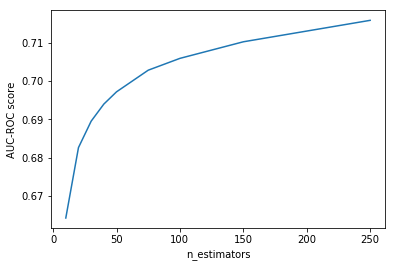

Number of trees with maximum quality score: 250
Maximum score: 0.715884530401


In [21]:
n, score = test_gb(X, y, kf)
print 'Number of trees with maximum quality score:', n
print 'Maximum score:', score

### Ускорение обучения с помощью уменьшения максимальной глубины деревьев 

Number of trees: 10
Time elapsed: 0:00:06.370000
Mean model score: 0.653251859313 

Number of trees: 20
Time elapsed: 0:00:10.329000
Mean model score: 0.674349887433 

Number of trees: 30
Time elapsed: 0:00:13.819000
Mean model score: 0.683118300953 

Number of trees: 40
Time elapsed: 0:00:16.262000
Mean model score: 0.688212159773 

Number of trees: 50
Time elapsed: 0:00:21.005000
Mean model score: 0.692133029135 

Number of trees: 75
Time elapsed: 0:00:30.230000
Mean model score: 0.697537582117 

Number of trees: 100
Time elapsed: 0:00:36.075000
Mean model score: 0.70138274531 

Number of trees: 150
Time elapsed: 0:00:54.285000
Mean model score: 0.706389195151 

Number of trees: 250
Time elapsed: 0:01:31.054000
Mean model score: 0.711355000992 



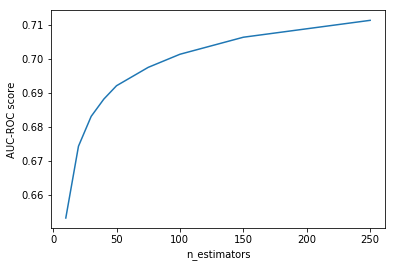

Number of trees with maximum quality score: 250
Maximum score: 0.711355000992


In [22]:
# устанавливаем максимальную глубину дерева max_depth=2
n, score = test_gb(X, y, kf, max_depth=2)
print 'Number of trees with maximum quality score:', n
print 'Maximum score:', score

 ### Отчет о подходе 1
 * Столбец с целевой переменной называется radiant_win.
 * Кросс-валидация для градиентного бустинга с 30 деревьями заняла около 22 секунд. Показатель метрики качества AUC-ROC при такой настройке классификатора равен 0.69.
 * Увеличение количества деревьев приводит к незначительному увеличению показателя метрики качества AUC-ROC (приближается к 0,72) при значительном увеличении затрат времени. Так, при 250 деревьях кросс-валидация заняла уже 2 минуты 37 секунд (время выросло в 7,14 раза по сравнению с вариантом с 30 деревьями), а показатель метрики качества AUC-ROC составил 0.71 (увеличился в 1,04 раза). Оптимум качества на испытанных значениях параметра n_estimators не достигнут. Качество, скорее всего, продолжит расти при дальнейшем увеличении этого параметра. Если главной целью является увеличение качества, то имеет смысл увеличивать количество деревьев.
 * Для ускорения обучения при увеличении количества деревьев можно использовать не всю выборку, а некоторое ее подмножество — например, половину объектов. Также можно уменьшить максимальную глубину деревьев (параметр max_depth, который для GradientBoostingClassifier по умолчанию равен 3). Так, при установке параметра max_depth=2 и n_estimators=250, кросс-валидация заняла 1 минуту 31 секунду (почти в 2 раза быстрее по сравнению с настройками классификатора max_depth=3 и n_estimators=250), а показатель метрики качества AUC-ROC составил всё те же 0.71.

# Подход 2: логистическая регрессия

In [23]:
# масштабируем признаки
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
def test_lr(X, y, kf):
    quality_scores = []
    C_powers = xrange(-5, 6)
    C_range = [10.0 ** p for p in C_powers]
    for C in C_range:
        start_time = datetime.datetime.now()
        print 'C =', str(C)
        # модель - логистическая регрессия с L2-регуляризацией - параметр penalty по умолчанию установлен в 'l2'
        model = LogisticRegression(C=C, random_state=42, n_jobs=-1)
        model_scores = cross_val_score(model, X, y, cv=kf, scoring='roc_auc', n_jobs=-1)
        print 'Time elapsed:', datetime.datetime.now() - start_time       
        print model_scores
        mean_model_score = np.mean(model_scores)
        print 'Mean model score:', mean_model_score, '\n'
        quality_scores.append(mean_model_score)
    plt.plot(C_powers, quality_scores)
    plt.xlabel('log(C)')
    plt.ylabel('score')
    plt.show()
    max_score = max(quality_scores)
    max_score_index = quality_scores.index(max_score)
    return C_range[max_score_index], max_score

### Подбор оптимального параметра регуляризации С

C = 1e-05
Time elapsed: 0:00:04.311000
[ 0.69300824  0.69404683  0.69457306  0.69525555  0.69754078]
Mean model score: 0.694884893793 

C = 0.0001
Time elapsed: 0:00:04.789000
[ 0.71041718  0.71049525  0.71198924  0.7132239   0.71425581]
Mean model score: 0.7120762763 

C = 0.001
Time elapsed: 0:00:05.714000
[ 0.71508977  0.71574203  0.71625898  0.71808033  0.71875084]
Mean model score: 0.716784388546 

C = 0.01
Time elapsed: 0:00:06.626000
[ 0.71523871  0.71614046  0.7162366   0.71838409  0.71872222]
Mean model score: 0.716944417389 

C = 0.1
Time elapsed: 0:00:06.753000
[ 0.71521956  0.71613676  0.71617488  0.7184037   0.71865638]
Mean model score: 0.716918256727 

C = 1.0
Time elapsed: 0:00:07.050000
[ 0.71521416  0.71613793  0.71617077  0.71840514  0.71864844]
Mean model score: 0.716915288468 

C = 10.0
Time elapsed: 0:00:07.082000
[ 0.71521416  0.71613805  0.71616974  0.7184061   0.71864675]
Mean model score: 0.716914960116 

C = 100.0
Time elapsed: 0:00:06.973000
[ 0.71521405  0.

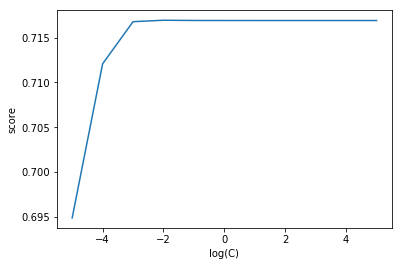

In [25]:
C, score = test_lr(X=X_scaled, y=y, kf=kf)

In [26]:
print 'Regulizer C with maximum quality score:', C
print 'Maximum score:', score

Regulizer C with maximum quality score: 0.01
Maximum score: 0.716944417389


Наилучшее значение показателя метрики качества AUC-ROC достигается при C = 0.01 и равно 0.7169. Аналогичный показатель качества был у градиентного бустинга с 250 деревьями, однако логистическая регрессия работает заметно быстрее градиентного бустинга.

### Удаление категориальных признаков 

C = 1e-05
Time elapsed: 0:00:04.225000
[ 0.69286886  0.69400903  0.69450402  0.69519939  0.69758012]
Mean model score: 0.694832285821 

C = 0.0001
Time elapsed: 0:00:04.835000
[ 0.71021102  0.71053954  0.71196551  0.71311635  0.71442552]
Mean model score: 0.712051586323 

C = 0.001
Time elapsed: 0:00:05.433000
[ 0.71493205  0.71577919  0.7162995   0.71797748  0.71896029]
Mean model score: 0.716789701483 

C = 0.01
Time elapsed: 0:00:06.258000
[ 0.71508435  0.71617923  0.71629756  0.71828661  0.71894918]
Mean model score: 0.716959385942 

C = 0.1
Time elapsed: 0:00:06.656000
[ 0.71506037  0.71617324  0.71624827  0.71830779  0.71888564]
Mean model score: 0.716935061362 

C = 1.0
Time elapsed: 0:00:06.747000
[ 0.71505823  0.71617153  0.71624049  0.71830956  0.71887985]
Mean model score: 0.716931930374 

C = 10.0
Time elapsed: 0:00:06.659000
[ 0.71505754  0.71617135  0.71623988  0.71831021  0.71887955]
Mean model score: 0.716931707915 

C = 100.0
Time elapsed: 0:00:06.578000
[ 0.71505766  

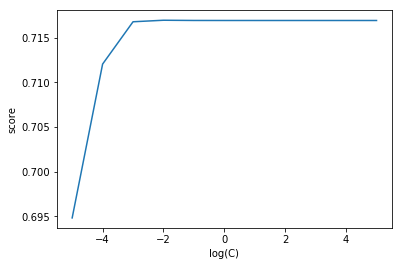

Regulizer C with maximum quality score: 0.01
Maximum score: 0.716959385942


In [27]:
X = delete_features(X, categorical_features_list)
X_scaled = scaler.fit_transform(X)
C, score = test_lr(X=X_scaled, y=y, kf=kf)
print 'Regulizer C with maximum quality score:', C
print 'Maximum score:', score

Удаление категориальных признаков не повлияло на качество модели. Наилучшее значение показателя метрики качества AUC-ROC в данном случае также достигается при C = 0.01 и равно 0.7169. Значит, удаленные категориальные признаки не вносили практически никакого вклада в значение показателя метрики качества и модель смогла это определить.

### Добавление "мешка слов" по героям

Всего в игре 112 различных идентификаторов геров

C = 1e-05
Time elapsed: 0:00:05.113000
[ 0.71191642  0.71315393  0.71314084  0.71641925  0.71694857]
Mean model score: 0.714315804464 

C = 0.0001
Time elapsed: 0:00:06.042000
[ 0.7404333   0.74181436  0.74133598  0.74726594  0.74448319]
Mean model score: 0.743066555041 

C = 0.001
Time elapsed: 0:00:08.061000
[ 0.74903133  0.75202713  0.74927861  0.75642329  0.75184674]
Mean model score: 0.751721418187 

C = 0.01
Time elapsed: 0:00:09.785000
[ 0.74949074  0.75288876  0.74941539  0.75671494  0.75183051]
Mean model score: 0.75206807007 

C = 0.1
Time elapsed: 0:00:10.629000
[ 0.74950262  0.7529039   0.7493718   0.75665745  0.75175766]
Mean model score: 0.752038688154 

C = 1.0
Time elapsed: 0:00:10.800000
[ 0.74950353  0.75289717  0.74936513  0.75664929  0.75174957]
Mean model score: 0.752032938988 

C = 10.0
Time elapsed: 0:00:10.710000
[ 0.74950219  0.75289791  0.74936408  0.75664847  0.75174934]
Mean model score: 0.752032396603 

C = 100.0
Time elapsed: 0:00:10.779000
[ 0.74950214  0

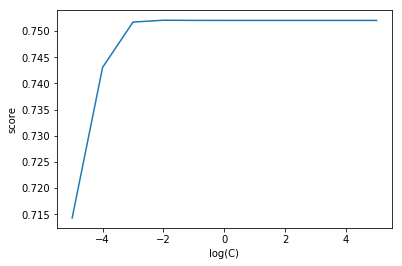

Regulizer C with maximum quality score: 0.01
Maximum score: 0.75206807007


In [28]:
X = pandas.concat([X, X_heroes], axis=1)
X_scaled = scaler.fit_transform(X)
C, score = test_lr(X=X_scaled, y=y, kf=kf)
print 'Regulizer C with maximum quality score:', C
print 'Maximum score:', score

При добавлении "мешка слов" по героям значение показателя метрики качества AUC-ROC заметно выросло. Теперь оно составляет 0.75207 при значении регуляризационного параметра C=0.01. Это значит, что некатегориальная информация из "мешка слов" о героях представляет собой осмысленную информацию, способную влиять на качество модели, в отличие от бессмысленных для логистической регрессии идентификаторов героев.

### Добавление "мешка слов" по типам комнат

Попробуем еще немного улучшить качество модели, добавив в набор признаков вместо удаленного ранее категориального признака **lobby_type** "мешок слов" по типам комнат. 

(97230, 213)
C = 1e-05
Time elapsed: 0:00:05.139000
[ 0.71239083  0.71355592  0.71338308  0.71632971  0.71722004]
Mean model score: 0.714575917478 

C = 0.0001
Time elapsed: 0:00:05.861000
[ 0.74088048  0.74212323  0.74159183  0.74714525  0.74457415]
Mean model score: 0.743262984979 

C = 0.001
Time elapsed: 0:00:08.283000
[ 0.74941288  0.75232873  0.74957503  0.75638717  0.75182978]
Mean model score: 0.751906715518 

C = 0.01
Time elapsed: 0:00:09.871000
[ 0.74984734  0.75319106  0.74971999  0.75671143  0.75178388]
Mean model score: 0.752250740476 

C = 0.1
Time elapsed: 0:00:10.558000
[ 0.7498519   0.7532048   0.74967576  0.75665925  0.75170675]
Mean model score: 0.752219693011 

C = 1.0
Time elapsed: 0:00:10.580000
[ 0.74985412  0.75319984  0.74967081  0.7566541   0.75169846]
Mean model score: 0.752215466993 

C = 10.0
Time elapsed: 0:00:10.585000
[ 0.7498549   0.75319921  0.74967046  0.75665262  0.75169724]
Mean model score: 0.752214884476 

C = 100.0
Time elapsed: 0:00:10.546000
[

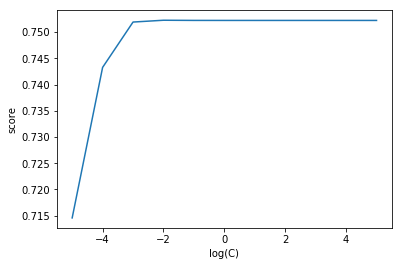

Regulizer C with maximum quality score: 0.01
Maximum score: 0.752250740476


In [29]:
X = pandas.concat([X, X_lobbies], axis=1)
print X.shape
X_scaled = scaler.fit_transform(X)
C, score = test_lr(X=X_scaled, y=y, kf=kf)
print 'Regulizer C with maximum quality score:', C
print 'Maximum score:', score

Видим, что значение показателя метрики качества AUC-ROC еще немного выросло. Теперь оно составляет 0.75225 при значении регуляризационного параметра C=0.01.

### Формируем предсказание для тестовой выборки с помощью лучшей выявленной модели 

In [30]:
# чтение файла с тестовой выборкой
df_test = pandas.read_csv('./features_test.csv', index_col='match_id')
# удаление категориальных признаков в тестовой выборке
X_test = delete_features(df_test, categorical_features_list)
# заполнение пропусков медианами
X_test = fill_null_values(X_test, 'median')
# получаем "мешок слов" по героям в тестовой выборке
X_heroes_test = get_bag(dataframe=df_test, desc=heroes, rule=hero)
X_test = pandas.concat([X_test, X_heroes_test], axis=1)
# получаем "мешок слов" по типам комнат в тестовой выборке
X_lobbies_test = get_bag(dataframe=df_test, desc=lobbies, rule=lobby)
X_test = pandas.concat([X_test, X_lobbies_test], axis=1)
# масштабируем признаки
X_scaled_test = scaler.fit_transform(X_test)

# обучаем лучшую выявленную модель по обучающей выборке
model = LogisticRegression(C=C, random_state=42, n_jobs=-1)
model.fit(X_scaled, y)

# получение предсказания
y_test = model.predict_proba(X_scaled_test)[:, 1]
y_test_min = min(y_test)
y_test_max = max(y_test)
print 'Minimum prediction value:', y_test_min
print 'Maximum prediction value:', y_test_max
# подготовка итогового датасета
result = pandas.DataFrame({'radiant_win': y_test}, index=X_test.index)
result.index.name = 'match_id'
# запись датасета в файл
result.to_csv('./dota2_lr.csv')

Minimum prediction value: 0.00878922377726
Maximum prediction value: 0.996540782312


Загруженная на kaggle.com в соревнование Dota 2: Win Probability Prediction итоговая модель получила оценку 0.75547.